In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dataset.zip', 'r')
zip_ref.extractall('/images')
zip_ref.close()

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam,SGD
from keras.applications.vgg16 import VGG16

In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [3]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [4]:
conv_base.trainable = False

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
train_data = keras.utils.image_dataset_from_directory(
    directory='dataset/data',
    labels='inferred',
    label_mode='int',
    batch_size = 10,
    image_size=(150,150)
)
# test_data = keras.utils.image_dataset_from_directory(
#     directory='test',
#     labels='inferred',
#     label_mode='int',
#     batch_size = 10,
#     image_size=(150,150)
# )
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_data.map(process)
# test_ds = test_data.map(process)

Found 7553 files belonging to 2 classes.


In [7]:
model.fit(train_ds,epochs=5)

Epoch 1/5
  7/756 [..............................] - ETA: 15:50 - loss: 0.6148 - accuracy: 0.7286

KeyboardInterrupt: 

1/1 [==============================] - 1s 1s/step


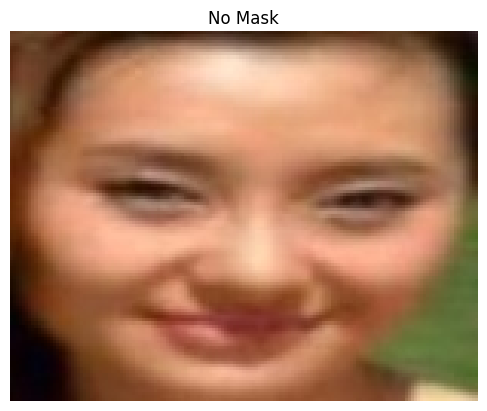

In [17]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('dataset/data/without_mask/without_mask_4.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
img = cv2.resize(img,(150,150))
img =img.reshape(1,150,150,3)
img = tf.cast(img,tf.float32)
img = img / 255
plt.axis('off')
pred = "Mask" if model.predict(img) <= 0.5 else "No Mask"
plt.title(pred)
plt.show()

In [15]:
model.save('saved_model/')

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


In [16]:
model = keras.models.load_model('saved_model/')